# Histogram of Random Guassian samples
    - count the number of samples that fall into each bin, and graph the counts

In [1]:
# setup

import math
import random
from collections import Counter
import matplotlib.pyplot as plt

# make plots render in the notebook, 
# instead of in an external window,
# which tends to be annoying
%matplotlib inline

In [2]:
# mean = 0, stddev = 1

[random.gauss(0,1) for j in range(10)]

[0.5942991140421516,
 0.21290327866070743,
 -1.1372397004108477,
 -1.8922618587130902,
 1.1254861369067521,
 0.09295472108431056,
 -0.32924708595462304,
 0.592400051973731,
 -1.1532903992029693,
 -0.3920828313566584]

In [3]:
# get 100,000 samples, and filter out data 
# greater than 3 SD
# can write large integers with an '_' every 
# three digits for readability
# nested list comprehensions

gds = [d for d in [random.gauss(0,1) for j in range(100_000)] if abs(d)<3]
len(gds)

99761

In [4]:
# int seems like an easy way to compute bin numbers
# int truncates the fraction part of the float

[int(3.4), int(-3.2)]

[3, -3]

In [5]:
# list of bins each data point fell into

bins = [int((gd /.2)) for gd in gds]
list(zip(bins, gds))[:20]

[(-5, -1.0954535980656184),
 (-6, -1.2573813440095374),
 (5, 1.0542066973442605),
 (-7, -1.5770628312013706),
 (0, -0.15332127850446484),
 (5, 1.0420197375352869),
 (0, -0.05277991766660469),
 (-5, -1.1037563507382702),
 (-6, -1.3434505822692482),
 (-1, -0.21598482313048348),
 (0, -0.13192065645435),
 (1, 0.29743501604651),
 (-5, -1.1714275410348844),
 (4, 0.9924761358063146),
 (-2, -0.59277233834811),
 (3, 0.6417921675010873),
 (-3, -0.7659289148138755),
 (-3, -0.6225005216517767),
 (-1, -0.2242279320079293),
 (-5, -1.1805323339598253)]

In [6]:
# a handy way to count a stream of things is the Counter class
# a Counter is a specialized dictionary

counter = Counter()

counter['foo'] += 1
counter['foo'] += 1
counter[4] += 1
counter[3] += 1

counter

Counter({'foo': 2, 4: 1, 3: 1})

In [7]:
# the count of a key that doesn't exist is always 0

counter[34324]

0

In [8]:
# count data points in each bin

counter = Counter()
for bin in bins:
    counter[bin] += 1

[counter, min(counter), max(counter)]

[Counter({-14: 101,
          -13: 211,
          -12: 354,
          -11: 553,
          -10: 945,
          -9: 1336,
          -8: 1867,
          -7: 2614,
          -6: 3440,
          -5: 4323,
          -4: 5360,
          -3: 6372,
          -2: 7181,
          -1: 7558,
          0: 15661,
          1: 7485,
          2: 7033,
          3: 6221,
          4: 5319,
          5: 4460,
          6: 3395,
          7: 2540,
          8: 1926,
          9: 1388,
          10: 913,
          11: 534,
          12: 356,
          13: 208,
          14: 107}),
 -14,
 14]

In [9]:
# compute x coords of bins in graph

x = range(min(counter), 1+max(counter))
x

range(-14, 15)

In [10]:
# match up bincnts with x coords

bincnts = [counter[xe] for xe in x]
bincnts

[101,
 211,
 354,
 553,
 945,
 1336,
 1867,
 2614,
 3440,
 4323,
 5360,
 6372,
 7181,
 7558,
 15661,
 7485,
 7033,
 6221,
 5319,
 4460,
 3395,
 2540,
 1926,
 1388,
 913,
 534,
 356,
 208,
 107]

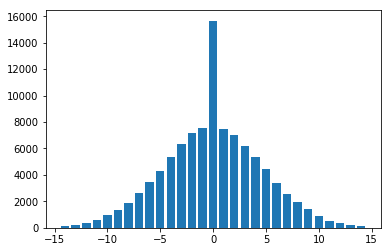

In [11]:
# hmmm...

# 1st arg is the xcoords of the bars 
# 2nd arg is the count

plt.bar(x, bincnts);

# let's do some plots and try to find the bug

In [12]:
# range doesn't work with floats
# use numpy

import numpy as np

np.linspace(0,1,10)

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

In [13]:
def plotf(func, low, high):
    # arg is function to plot
    # make a set of x vals
    x = np.linspace(low, high, 50)
    # eval the func on the x vals
    y = [func(xv) for xv in x]
    plt.plot(x, y, 'r', linewidth=10)
    plt.grid(True)

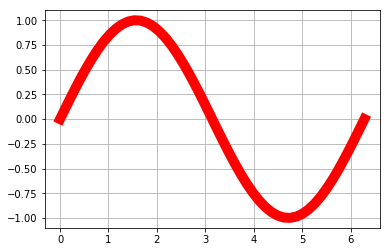

In [14]:
# test

plotf(math.sin, 0, math.pi*2)

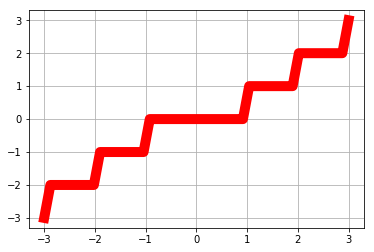

In [15]:
# plot int

plotf(int,-3,3)

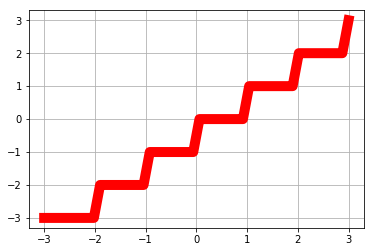

In [16]:
# math.floor 

plotf(math.floor,-3,3)